# Implementing SGD from Scratch

### 1. Importing and Loading Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
X = load_boston().data
Y = load_boston().target

### 2. Splitting and Scaling the data

In [3]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
X_train.shape

(404, 13)

In [6]:
Y_train = Y_train.reshape(-1,1)
Y_train.shape

(404, 1)

In [7]:
train_df = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
train_df['PRICE'] = list(Y_train)

test_df = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
test_df['PRICE'] = list(Y_test)

train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.276470,-0.507766,-0.402012,-0.272888,-0.118484,-0.848834,0.963877,-0.022455,-0.636453,-0.583618,1.175619,-0.000302,0.835288,[13.1]
1,-0.407464,3.331365,-1.431888,3.664502,-1.314148,2.361809,-1.516597,0.999022,-0.981745,-1.231926,-2.202859,0.412907,-1.325495,[50.0]
2,8.064832,-0.507766,1.078157,-0.272888,1.112090,-0.478931,1.140549,-0.988813,1.665490,1.551633,0.810378,-3.849276,1.158196,[8.8]
3,-0.403977,-0.507766,0.161225,-0.272888,0.186977,-0.243407,0.317257,-0.752702,-0.981745,-0.785842,1.175619,0.428424,-0.483373,[20.6]
4,0.696610,-0.507766,1.078157,-0.272888,1.234274,0.166954,1.140549,-1.068474,1.665490,1.551633,0.810378,0.194665,1.114099,[12.1]


###  3. Initializing the weight and intercept term and SGD implementation

In [8]:
##cite : 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html' - for learning rate 
##cite : 'https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/'

w_coeff=np.random.randn(13,1) #Randomly initalizing weights
b_coeff=np.random.randn(1,1)  #Randomly picking up intercept value.
n_epochs = 500
lr_rate = 1
k_sample = 160
for epoch in range(1,n_epochs+1):
    sum_errors = 0 #Sum of squared loss.
    N = X_train.shape[0] #The variable N in the SGD equation.

    for i in range(k_sample):                                       
        train_sample = train_df.sample(k_sample)                    ## Sampling K points 
        Y_sample = np.asmatrix(train_sample["PRICE"]).T
        X_sample = np.asmatrix(train_sample.drop("PRICE", axis = 1))

        X_i = X_sample[i,:].reshape(1,X_train.shape[1])
        y_i = Y_sample[i].reshape(-1,1)


        y_pred = np.dot(X_i,w_coeff) + b_coeff                  #y_curr = WT.X + B
        loss = y_pred - y_i                                     #w_grad = (-2/N)*(X)*(y-(WT.X+B)) = (-2/N)*(X) * loss 
        sum_errors += loss**2                                   #b_grad = (-2/N)*(y-(WT.X+B)) = (-2/N) * loss

        w_grad = X_i.T.dot((y_pred - y_i))
        b_grad = (y_pred - y_i)

        w_coeff = w_coeff -(2/N)*lr_rate*(w_grad)
        b_coeff = b_coeff - (2/N)*lr_rate*(b_grad)

    print("Epoch: %d, Loss: %.3f" %(epoch, sum_errors/N))
    #lr_rate = lr_rate/3.2
    lr_rate = lr_rate / pow(epoch, 0.25)             ## Learning rate based on Sklearn's SGD Regressor

    

Epoch: 1, Loss: 148.255
Epoch: 2, Loss: 32.273
Epoch: 3, Loss: 13.151
Epoch: 4, Loss: 11.730
Epoch: 5, Loss: 12.866
Epoch: 6, Loss: 10.572
Epoch: 7, Loss: 15.405
Epoch: 8, Loss: 8.142
Epoch: 9, Loss: 10.226
Epoch: 10, Loss: 14.993
Epoch: 11, Loss: 7.326
Epoch: 12, Loss: 14.350
Epoch: 13, Loss: 10.354
Epoch: 14, Loss: 8.095
Epoch: 15, Loss: 11.997
Epoch: 16, Loss: 9.386
Epoch: 17, Loss: 10.968
Epoch: 18, Loss: 8.527
Epoch: 19, Loss: 10.801
Epoch: 20, Loss: 8.220
Epoch: 21, Loss: 11.292
Epoch: 22, Loss: 7.721
Epoch: 23, Loss: 12.604
Epoch: 24, Loss: 8.541
Epoch: 25, Loss: 7.772
Epoch: 26, Loss: 9.620
Epoch: 27, Loss: 6.752
Epoch: 28, Loss: 9.777
Epoch: 29, Loss: 11.827
Epoch: 30, Loss: 10.979
Epoch: 31, Loss: 10.442
Epoch: 32, Loss: 10.097
Epoch: 33, Loss: 14.456
Epoch: 34, Loss: 15.489
Epoch: 35, Loss: 8.226
Epoch: 36, Loss: 13.440
Epoch: 37, Loss: 8.374
Epoch: 38, Loss: 7.965
Epoch: 39, Loss: 8.197
Epoch: 40, Loss: 7.581
Epoch: 41, Loss: 8.189
Epoch: 42, Loss: 7.826
Epoch: 43, Loss: 12

Epoch: 342, Loss: 11.953
Epoch: 343, Loss: 13.400
Epoch: 344, Loss: 8.519
Epoch: 345, Loss: 8.547
Epoch: 346, Loss: 9.100
Epoch: 347, Loss: 13.511
Epoch: 348, Loss: 10.385
Epoch: 349, Loss: 9.607
Epoch: 350, Loss: 13.094
Epoch: 351, Loss: 10.897
Epoch: 352, Loss: 9.278
Epoch: 353, Loss: 7.736
Epoch: 354, Loss: 6.903
Epoch: 355, Loss: 8.041
Epoch: 356, Loss: 9.672
Epoch: 357, Loss: 8.256
Epoch: 358, Loss: 8.279
Epoch: 359, Loss: 7.136
Epoch: 360, Loss: 14.588
Epoch: 361, Loss: 9.869
Epoch: 362, Loss: 12.524
Epoch: 363, Loss: 11.089
Epoch: 364, Loss: 15.215
Epoch: 365, Loss: 9.733
Epoch: 366, Loss: 5.326
Epoch: 367, Loss: 7.505
Epoch: 368, Loss: 7.305
Epoch: 369, Loss: 11.872
Epoch: 370, Loss: 10.825
Epoch: 371, Loss: 11.928
Epoch: 372, Loss: 11.574
Epoch: 373, Loss: 14.252
Epoch: 374, Loss: 9.748
Epoch: 375, Loss: 8.892
Epoch: 376, Loss: 6.936
Epoch: 377, Loss: 6.822
Epoch: 378, Loss: 8.685
Epoch: 379, Loss: 10.898
Epoch: 380, Loss: 7.525
Epoch: 381, Loss: 9.458
Epoch: 382, Loss: 12.944

In [9]:
X_test=np.array(X_test)
y_pred =[]
for i in range(0,len(X_test)):
    y=np.asscalar(np.dot(w_coeff.T,X_test[i]) + b_coeff) #Convert an array of size 1 to its scalar equivalent.
    y_pred.append(y)

In [10]:
print(mean_squared_error(Y_test, y_pred))

20.18234583760414


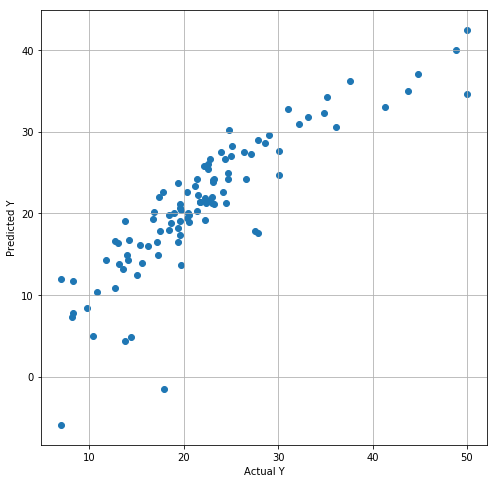

In [11]:
plt.figure(figsize=(8,8))
plt.grid()
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.show()

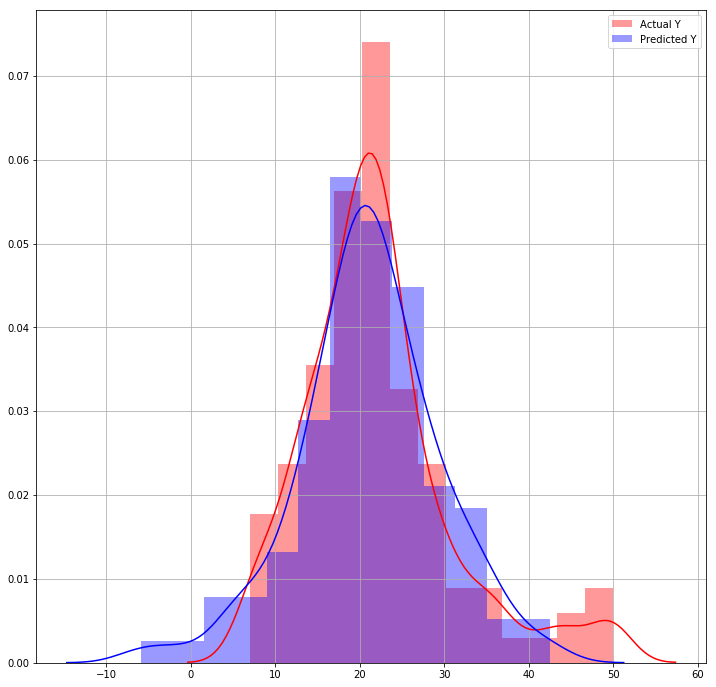

In [12]:
plt.figure(figsize=(12,12))
plt.grid()
sns.distplot(Y_test,label = "Actual Y", color = 'red')
sns.distplot(y_pred,label = "Predicted Y", color = 'blue')
plt.legend()
plt.show()

### 4. Implementing SGD Regressor Sk Learn

In [13]:
clf = SGDRegressor()
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_test, clf.predict(X_test)))
print(clf.coef_)

20.469195875801002
[-0.82045479  0.67556622 -0.35006314  0.84354443 -0.95867138  2.81238863
  0.22636296 -1.83833383  1.17549192 -0.40505883 -1.84903012  0.9919517
 -3.90894202]


C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


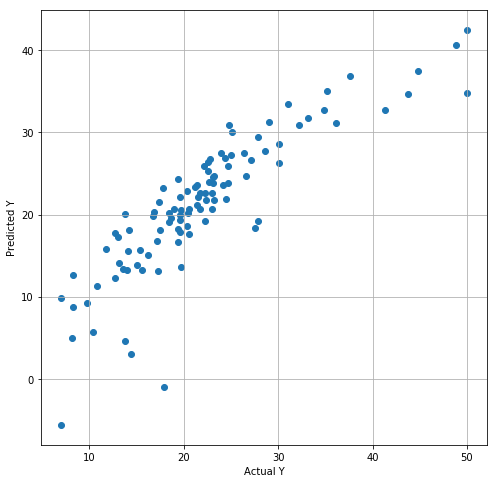

In [14]:
plt.figure(figsize=(8,8))
plt.grid()
plt.scatter(Y_test,clf.predict(X_test))
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.show()

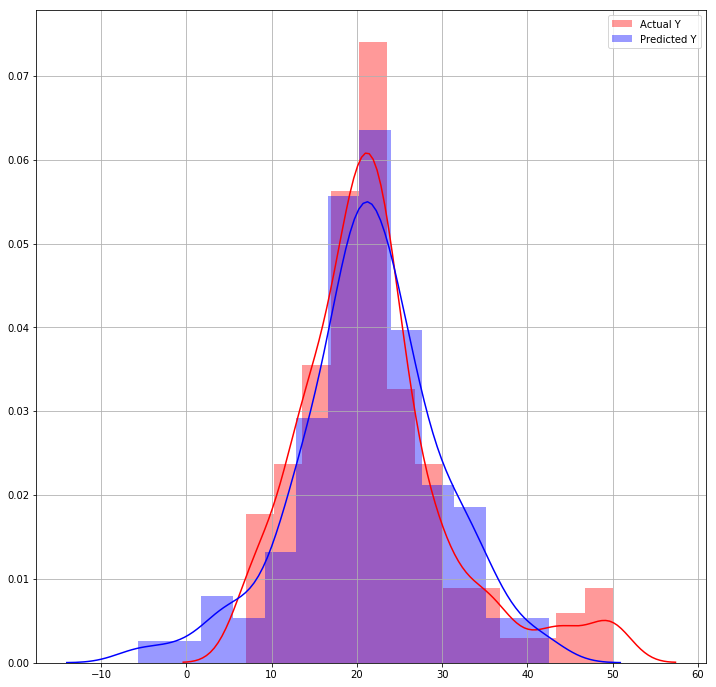

In [15]:
plt.figure(figsize=(12,12))
plt.grid()
sns.distplot(Y_test,label = "Actual Y", color = 'red')
sns.distplot(clf.predict(X_test),label = "Predicted Y", color = 'blue')
plt.legend()
plt.show()

### 5. Implementing Sk Learn's Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

#Fit the LinearRegression() model to the training data and Predict the class labels of the test data.
model = LinearRegression()
model.fit(X_train , Y_train ) 
print(mean_squared_error(Y_test, model.predict(X_test)))

20.869292183770817


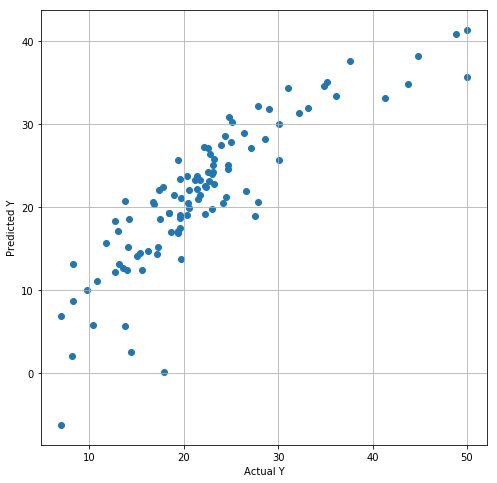

In [17]:
plt.figure(figsize=(8,8))
plt.grid()
plt.scatter(Y_test,model.predict(X_test))
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.show()

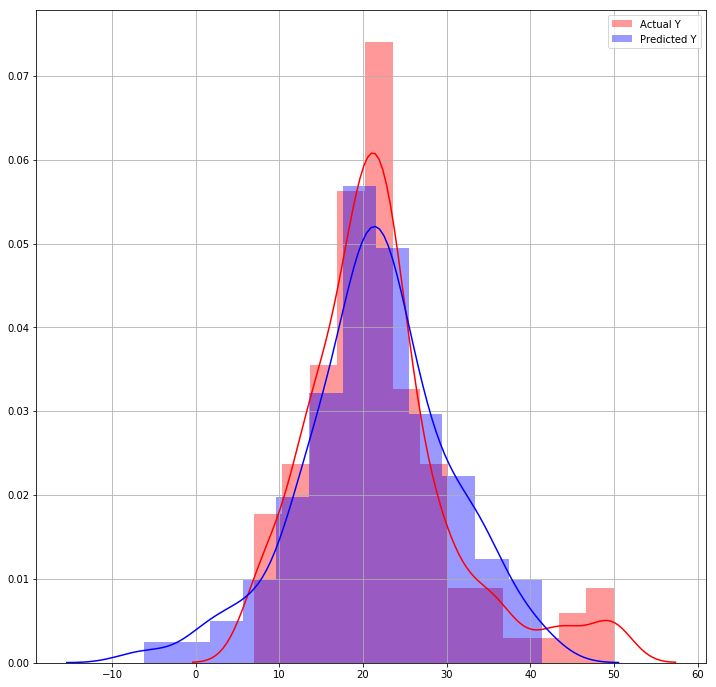

In [18]:
plt.figure(figsize=(12,12))
plt.grid()
sns.distplot(Y_test,label = "Actual Y", color = 'red')
sns.distplot(model.predict(X_test),label = "Predicted Y", color = 'blue')
plt.legend()
plt.show()

### 6. Comparison of self implemented SGD with sklearn SGD 

In [19]:
from prettytable import PrettyTable
pt = PrettyTable(["Weights from Sk Learn","Weights from LR","Self implemented weights"])
for i in range(len(w_coeff)):
    pt.add_row([clf.coef_[i],model.coef_.item(i),w_coeff.item(i)])

print(pt)

+-----------------------+----------------------+--------------------------+
| Weights from Sk Learn |   Weights from LR    | Self implemented weights |
+-----------------------+----------------------+--------------------------+
|  -0.8204547915623558  | -1.1350271893464843  |      [-0.72024292]       |
|   0.6755662209041208  |  1.1581452705247033  |       [0.54197714]       |
|  -0.35006314312850323 | 0.00737057333182942  |       [0.25589672]       |
|   0.8435444296077227  |  0.6870963456917102  |       [0.59388363]       |
|  -0.9586713768495976  | -1.8283700073391242  |      [-1.19776684]       |
|   2.812388626381978   |  2.362718789090427   |       [3.12519472]       |
|  0.22636296197895603  | 0.031665377982249276 |      [-0.19503754]       |
|  -1.8383338328935648  |  -3.066327745654661  |      [-1.95649617]       |
|   1.1754919246231517  |  3.1662148208383147  |       [0.29313923]       |
|  -0.4050588303292087  | -2.2145785213149654  |       [-0.1617005]       |
|  -1.849030

In [20]:
pt = PrettyTable(["Intercept from Sk Learn SGDR","Intercept from Sk Learn LR", "Intercept from Self implemented weights"])
pt.add_row([clf.intercept_,model.intercept_,b_coeff.item(0)])

print(pt)

+------------------------------+----------------------------+-----------------------------------------+
| Intercept from Sk Learn SGDR | Intercept from Sk Learn LR | Intercept from Self implemented weights |
+------------------------------+----------------------------+-----------------------------------------+
|        [22.30728675]         |       [22.64678218]        |              [21.87888196]              |
+------------------------------+----------------------------+-----------------------------------------+


In [21]:
pt = PrettyTable(["MSE from Sk Learn SGDR","MSE from Sk Learn LR" ,"MSE from Self implemented weights"])
pt.add_row([mean_squared_error(Y_test, clf.predict(X_test)),mean_squared_error(Y_test, model.predict(X_test)),mean_squared_error(Y_test, y_pred)])
print(pt)

+------------------------+----------------------+-----------------------------------+
| MSE from Sk Learn SGDR | MSE from Sk Learn LR | MSE from Self implemented weights |
+------------------------+----------------------+-----------------------------------+
|   20.469195875801002   |  20.869292183770817  |         20.18234583760414         |
+------------------------+----------------------+-----------------------------------+


### 7. Conclusion

1. MSE from both sk learn's model are almost same.
2. MSE from custom implementation is very close to both of the sk learn models.
3. From the pdfs we can see that the predicted values for all 3 models are similar to each other.